In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
import sklearn
import warnings
import time

warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

## Início da Análise Exploratória

In [3]:
# Carregar o conjunto de dados
df = pd.read_csv('Dados/dados.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.00,0.00,0.00,0.00,1.00,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.00,0.00,0.00,0.00,2.00,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.00,-1.00,0.00,-1.00,1.00,-1.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.00,0.00,0.00,0.00,2.00,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.00,0.00,0.00,0.00,10.00,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Verificar o shape do conjunto de dados
df.shape

(12330, 18)

In [5]:
# Verificar os nomes das colunas
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
# Verificar os tipos de dados
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
# Verificar os valores únicos
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [8]:
# Verificar se existem valores ausentes
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [9]:
# Remover valores ausentes
df.dropna(inplace=True)

In [10]:
# Verificar se ainda existem valores ausentes
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
df.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [12]:
# Verificar as informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType              12

In [13]:
# Criar uma cópia do dataset original
df_segm = df.copy()

# Criar listas vazias para dados contínuos e outra para categóricos
continuo = []
categorico = []

# Selecionar todas as variáveis com mais de 30 valores distintos como contínuos
for c in df_segm.columns[:-1]:
    if df_segm.nunique()[c] >= 30:
        continuo.append(c)
    else:
        categorico.append(c)
continuo

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [14]:
categorico

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [15]:
# Verificar as primeiras linhas
df_segm[continuo].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.00,0.00,1.00,0.00,0.20,0.20,0.00
1,0.00,0.00,2.00,64.00,0.00,0.10,0.00
2,-1.00,-1.00,1.00,-1.00,0.20,0.20,0.00
3,0.00,0.00,2.00,2.67,0.05,0.14,0.00
4,0.00,0.00,10.00,627.50,0.02,0.05,0.00


In [16]:
df_segm[categorico].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.00,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False
1,0.00,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False
2,0.00,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False
3,0.00,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False
4,0.00,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True


Explorando as variáveis numéricas

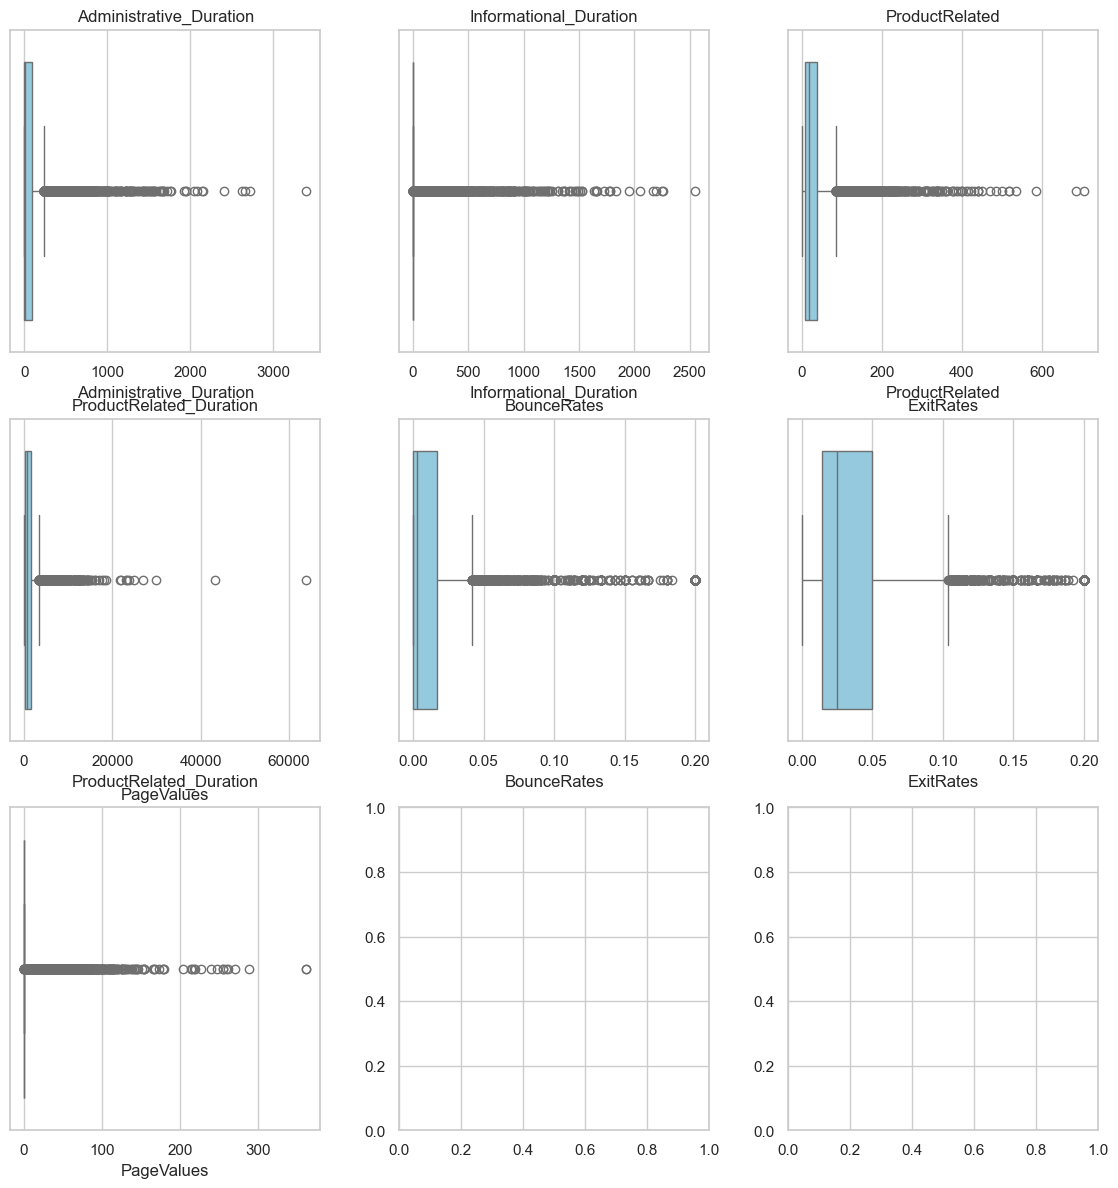

In [17]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar boxplots com o Seaborn
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.tight_layout(pad=2.0)

# Criar boxplots
for i, col in enumerate(continuo):
    sns.boxplot(x=df_segm[col], ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(col)

plt.show()

In [18]:
# Transforma todas as variáveis na mesma escala
df_segm[continuo] = np.log1p(1 + df_segm[continuo])

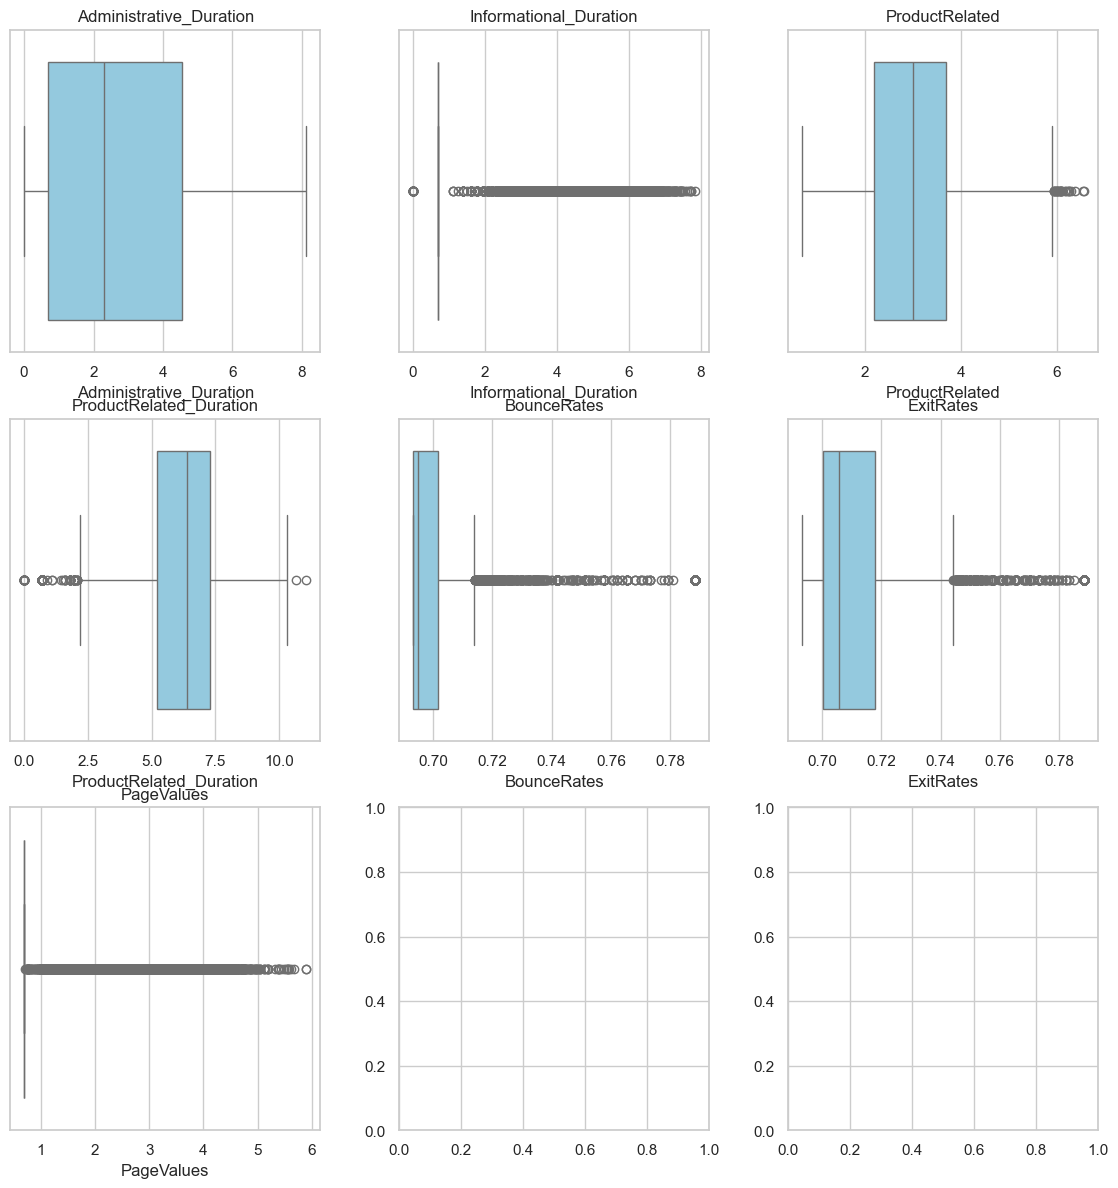

In [19]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar boxplots com o Seaborn
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
fig.tight_layout(pad=2.0)

for i, col in enumerate(continuo):
    sns.boxplot(x=df_segm[col], ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(col)

plt.show()

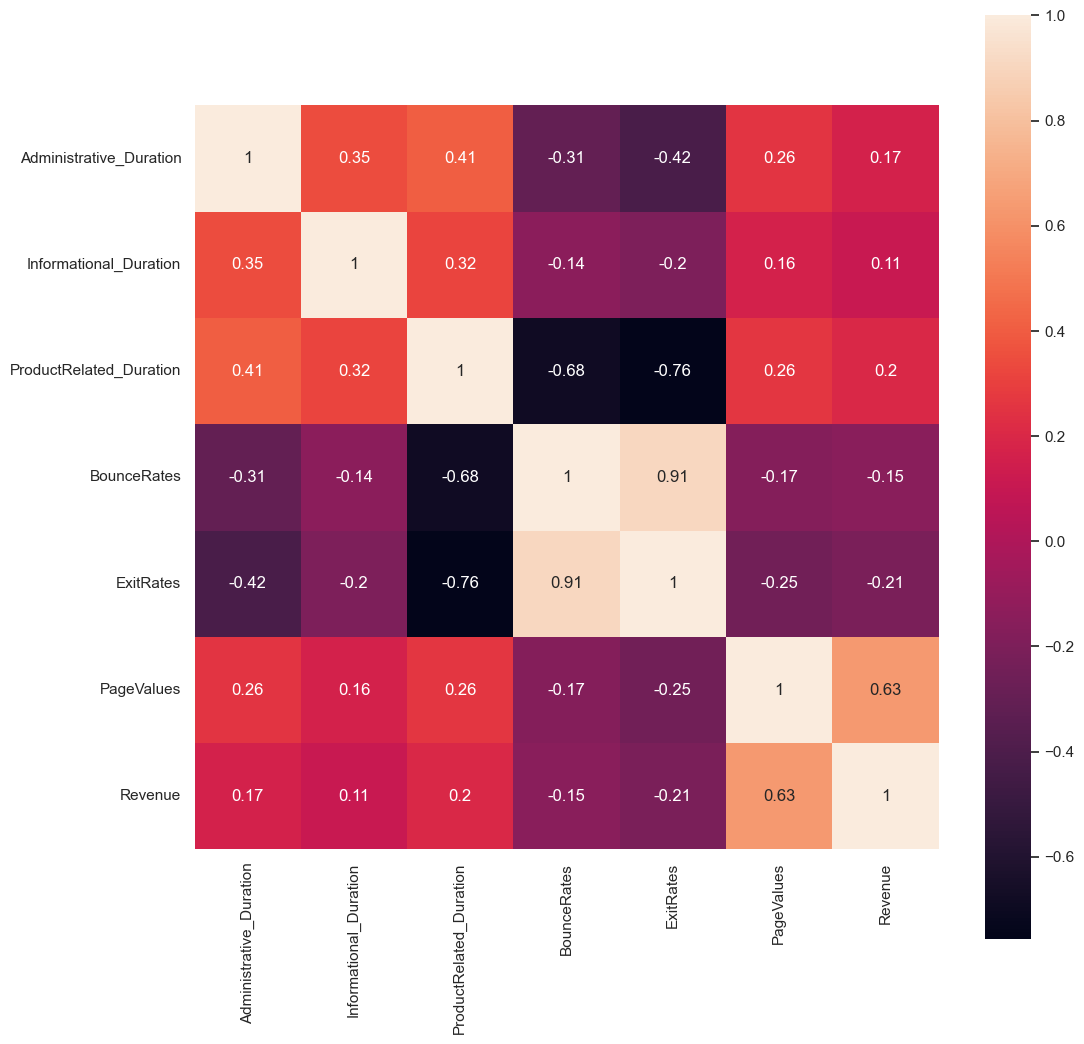

In [47]:
# Criar heatmap
plt.figure(figsize = (12,12))

sns.heatmap(df_segm[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True, annot=True)
plt.show()

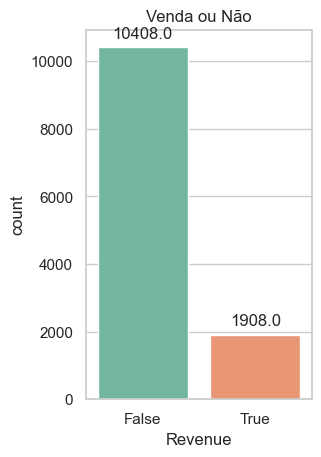

In [21]:
# Verificar o balanceamento da variável alvo
plt.subplot(1, 2, 2)
plt.title("Venda ou Não")
sns.countplot(x='Revenue', data=df, palette='Set2')

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

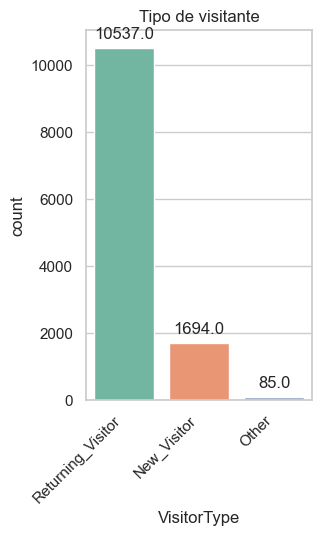

In [22]:
# Criar gráfico de barras
plt.subplot(1, 2, 2)
plt.title("Tipo de visitante")
sns.countplot(x='VisitorType', data=df, palette='Set2')

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=45, ha='right')
plt.show()

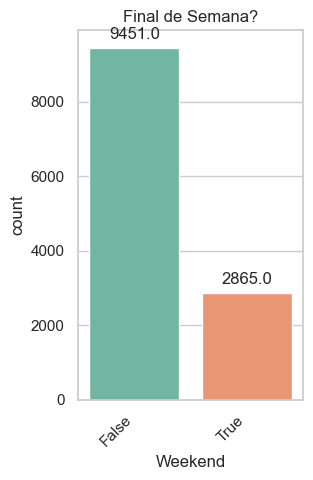

In [23]:
# Criar gráfico de barras
plt.subplot(1, 2, 2)
plt.title("Final de Semana?")
sns.countplot(x='Weekend', data=df, palette='Set2')

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=45, ha='right')
plt.show()

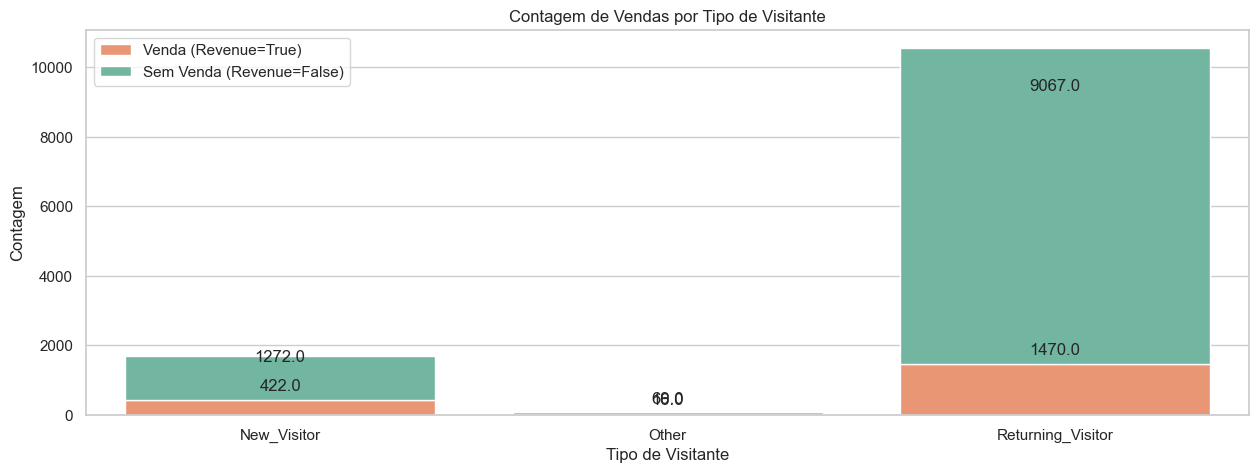

In [24]:
# Crosstab para contar as ocorrências
ct = pd.crosstab(df['VisitorType'], df['Revenue'])

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Definir a paleta de cores
palette = sns.color_palette('Set2')

# Criar o gráfico de barras empilhadas com o Seaborn usando a paleta de cores Set2
plt.figure(figsize=(15, 5))
sns.barplot(x=ct.index, y=ct[True], color=palette[1], label='Venda (Revenue=True)')
sns.barplot(x=ct.index, y=ct[False], bottom=ct[True], color=palette[0], label='Sem Venda (Revenue=False)')

# Adicionar rótulos e título
plt.xlabel('Tipo de Visitante')
plt.ylabel('Contagem')
plt.title('Contagem de Vendas por Tipo de Visitante')
plt.legend()

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

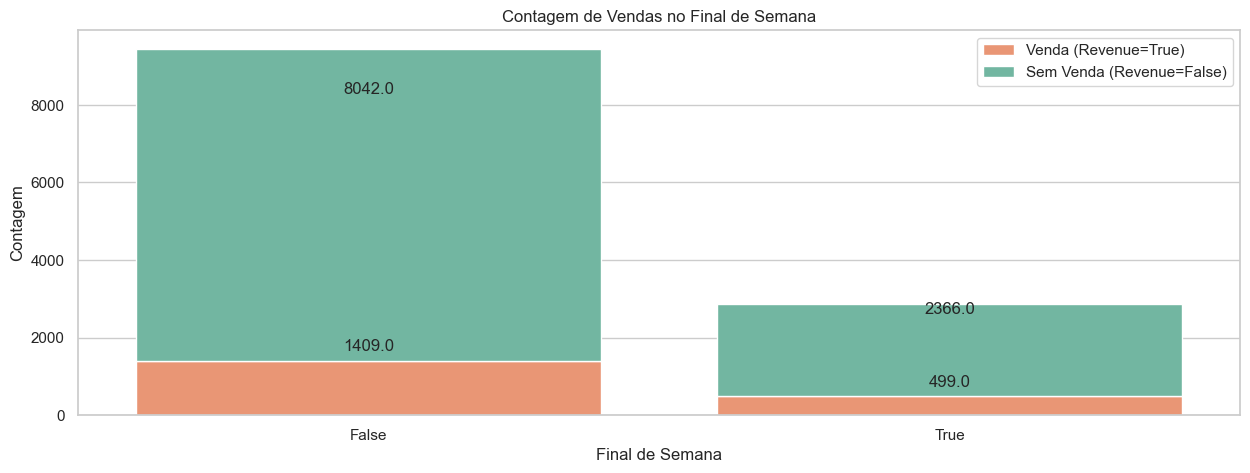

In [25]:
# Crosstab para contar as ocorrências
ct = pd.crosstab(df['Weekend'], df['Revenue'])

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Definir a paleta de cores
palette = sns.color_palette('Set2')

# Criar o gráfico de barras empilhadas com o Seaborn usando a paleta de cores Set2
plt.figure(figsize=(15, 5))
sns.barplot(x=ct.index, y=ct[True], color=palette[1], label='Venda (Revenue=True)')
sns.barplot(x=ct.index, y=ct[False], bottom=ct[True], color=palette[0], label='Sem Venda (Revenue=False)')

# Adicionar rótulos e título
plt.xlabel('Final de Semana')
plt.ylabel('Contagem')
plt.title('Contagem de Vendas no Final de Semana')
plt.legend()

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

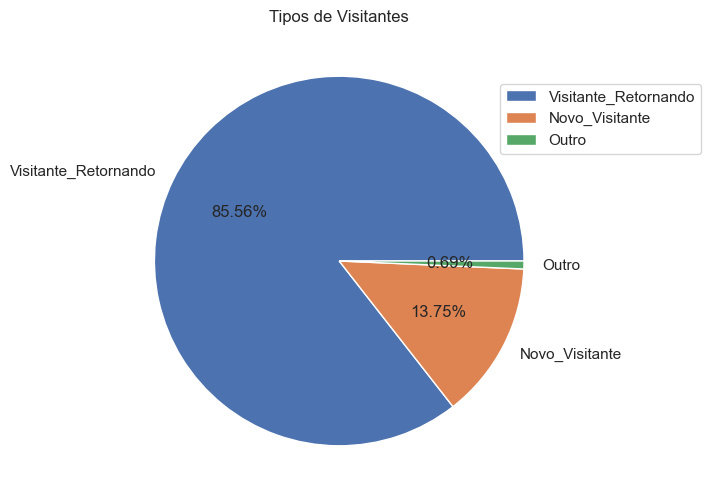

In [26]:
# Criar o gráfico de pizza
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.figure(figsize=(10, 6))
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels=labels, autopct='%.2f%%')

# Mover a legenda para o canto superior direito
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.9))

plt.show()

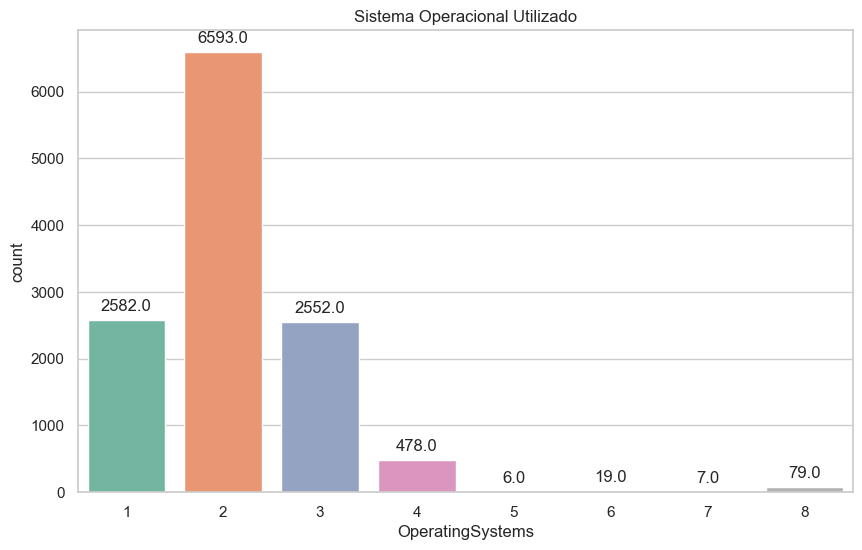

In [27]:
# Criar o gráfico de barras
plt.figure(figsize = (10,6))
plt.title("Sistema Operacional Utilizado")
sns.countplot(x='OperatingSystems', data=df, palette='Set2')

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

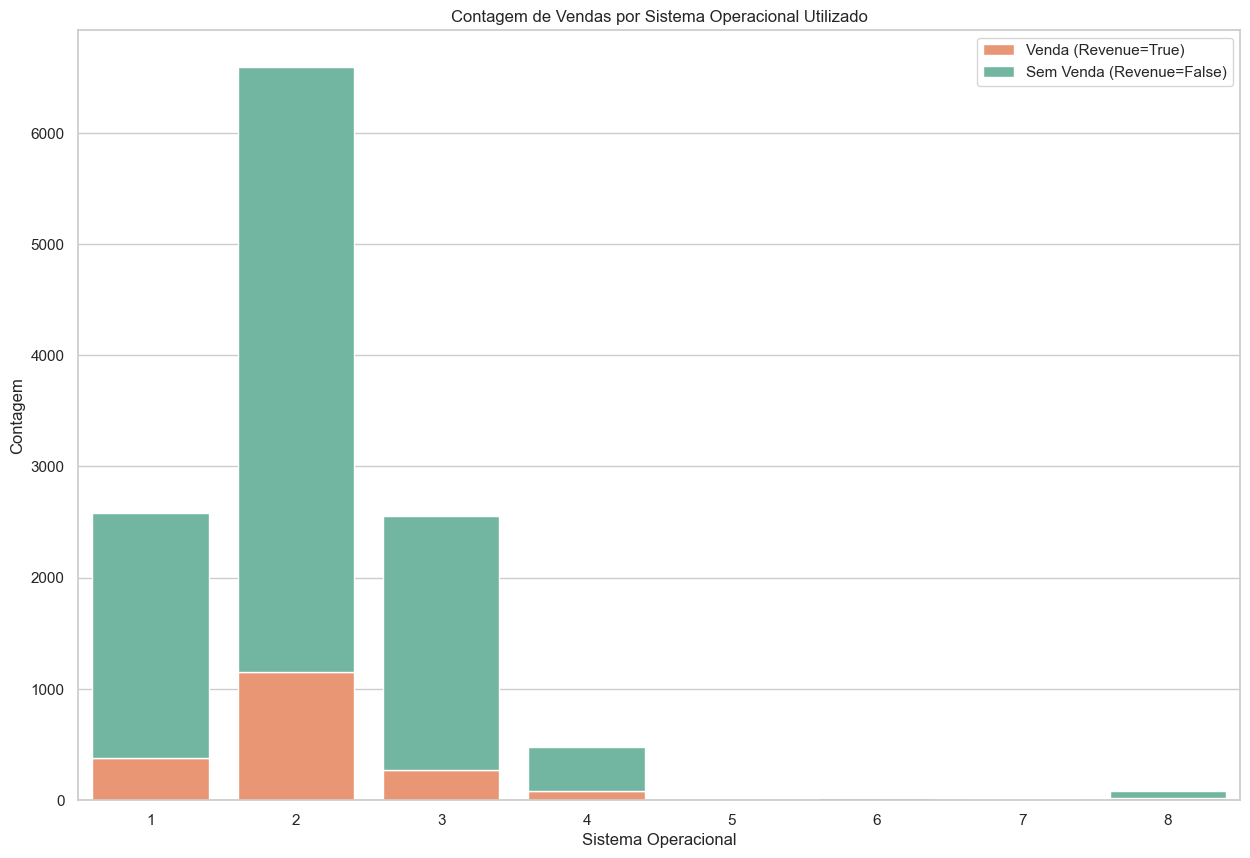

In [28]:
# Crosstab para contar as ocorrências
ct = pd.crosstab(df['OperatingSystems'], df['Revenue'])

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Definir a paleta de cores
palette = sns.color_palette('Set2')

# Criar o gráfico de barras empilhadas com o Seaborn usando a paleta de cores Set2
plt.figure(figsize=(15, 10))
sns.barplot(x=ct.index, y=ct[True], color=palette[1], label='Venda (Revenue=True)')
sns.barplot(x=ct.index, y=ct[False], bottom=ct[True], color=palette[0], label='Sem Venda (Revenue=False)')

# Adicionar rótulos e título
plt.xlabel('Sistema Operacional')
plt.ylabel('Contagem')
plt.title('Contagem de Vendas por Sistema Operacional Utilizado')
plt.legend()

plt.show()

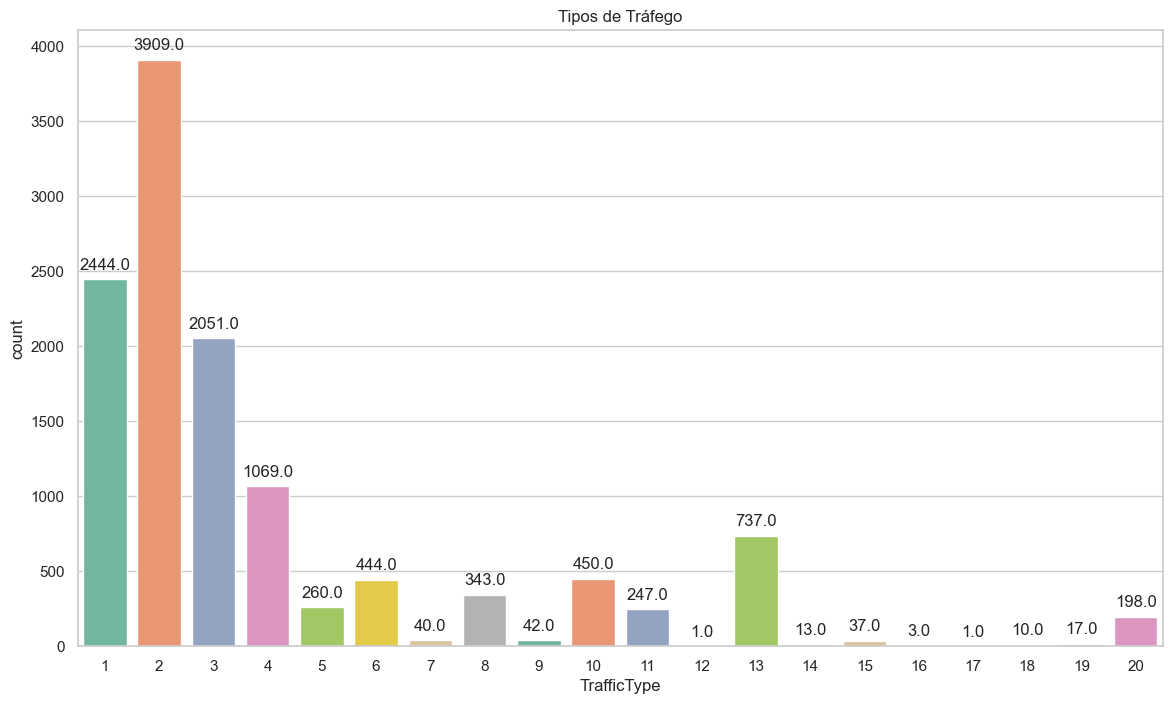

In [29]:
plt.figure(figsize = (14,8))
plt.title("Tipos de Tráfego")
sns.countplot(x='TrafficType', data=df, palette='Set2')

# Adicionar rótulos e contagens acima das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

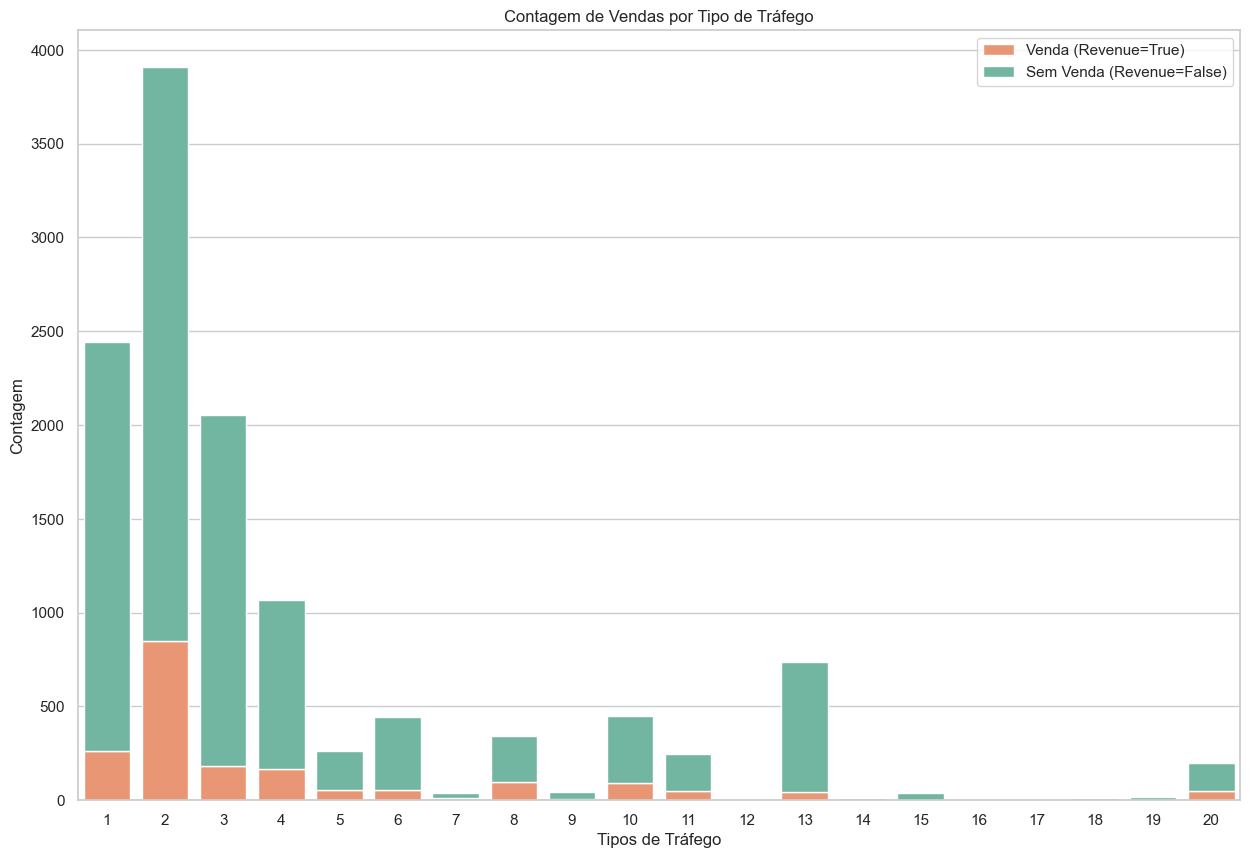

In [30]:
# Crosstab para contar as ocorrências
ct = pd.crosstab(df['TrafficType'], df['Revenue'])

# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Definir a paleta de cores
palette = sns.color_palette('Set2')

# Criar o gráfico de barras empilhadas com o Seaborn usando a paleta de cores Set2
plt.figure(figsize=(15, 10))
sns.barplot(x=ct.index, y=ct[True], color=palette[1], label='Venda (Revenue=True)')
sns.barplot(x=ct.index, y=ct[False], bottom=ct[True], color=palette[0], label='Sem Venda (Revenue=False)')

# Adicionar rótulos e título
plt.xlabel('Tipos de Tráfego')
plt.ylabel('Contagem')
plt.title('Contagem de Vendas por Tipo de Tráfego')
plt.legend()

plt.show()

## Praparação dos dados

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType              12

OneHotEncoding

In [32]:
# Encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis do tipo object que estão como string
df['Month'] = lb.fit_transform(df['Month'])
df['VisitorType'] = lb.fit_transform(df['VisitorType'])

# Remove valores missing eventualmente gerados
df.dropna(inplace = True)

In [33]:
df.shape

(12316, 18)

In [34]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
963,2.00,47.00,0.00,0.00,17.00,411.62,0.00,0.02,0.00,0.00,5,2,2,4,3,2,False,False
9580,3.00,30.00,1.00,0.00,3.00,14.00,0.00,0.03,0.00,0.00,7,2,4,4,2,2,False,False
1872,1.00,40.00,0.00,0.00,15.00,839.50,0.02,0.05,0.00,0.00,5,2,2,4,1,2,False,False
5784,0.00,0.00,0.00,0.00,43.00,3747.83,0.02,0.05,0.00,0.00,3,2,2,3,13,2,False,False
3414,1.00,24.00,0.00,0.00,54.00,801.51,0.01,0.01,0.00,0.20,6,1,1,1,3,2,False,False
4212,0.00,0.00,0.00,0.00,76.00,2854.78,0.01,0.02,0.00,0.00,6,2,2,3,4,2,False,False
12127,1.00,46.50,0.00,0.00,40.00,2338.95,0.02,0.03,9.47,0.00,7,1,1,1,3,2,False,True
1925,0.00,0.00,0.00,0.00,1.00,0.00,0.20,0.20,0.00,0.00,5,3,2,1,1,2,False,False
1425,3.00,221.00,0.00,0.00,17.00,489.58,0.00,0.01,0.00,0.00,5,1,1,1,3,0,True,False
1620,5.00,73.50,0.00,0.00,26.00,463.76,0.00,0.00,0.00,0.00,5,2,2,3,2,0,False,False


In [35]:
# Verificando se a variável target está balanceada
target_count = df.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

In [36]:
df.iloc[:,:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.00,0.00,0.00,0.00,1.00,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,2,False
1,0.00,0.00,0.00,0.00,2.00,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,2,False
2,0.00,-1.00,0.00,-1.00,1.00,-1.00,0.20,0.20,0.00,0.00,2,4,1,9,3,2,False
3,0.00,0.00,0.00,0.00,2.00,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,2,False
4,0.00,0.00,0.00,0.00,10.00,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,2,True


In [37]:
df.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Oversampling

In [38]:
seed = 100

x = df.iloc[:, :17]  
y = df.iloc[:, 17] 

# Balanceador SMOTE
smote = SMOTE(random_state = seed)

# Aplica o balanceador
x_res, y_res = smote.fit_resample(x, y)

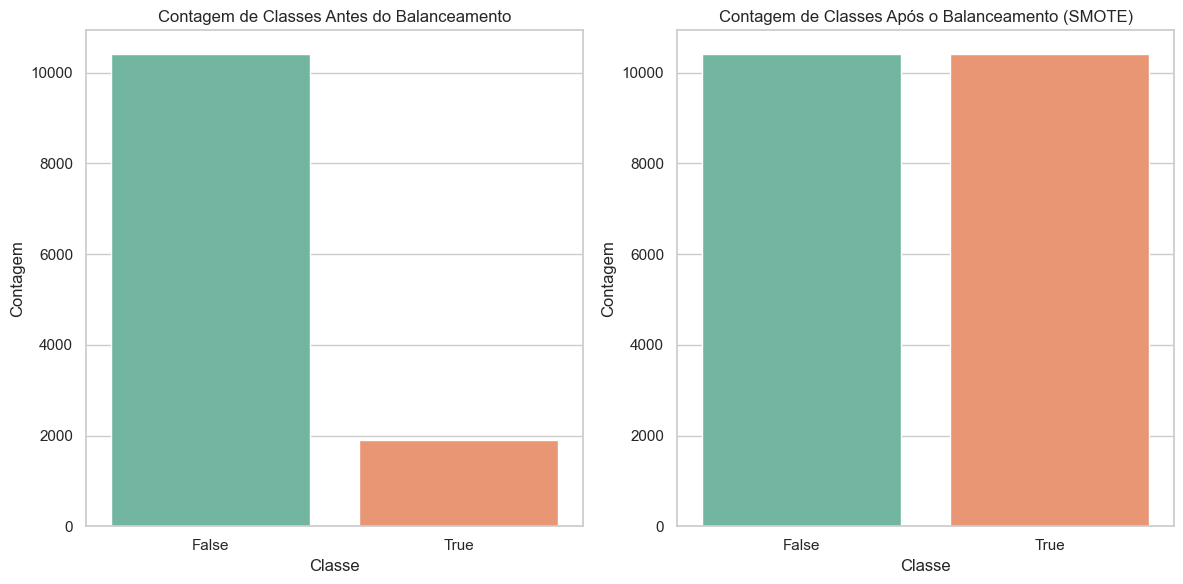

In [51]:
# Contagens antes e depois do balanceamento
count_before = y.value_counts()
count_after = pd.Series(y_res).value_counts()

# Criar subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de antes do balanceamento
sns.barplot(x=count_before.index, y=count_before.values, ax=axes[0], palette='Set2')

axes[0].set_title('Contagem de Classes Antes do Balanceamento')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Contagem')

# Gráfico de depois do balanceamento
sns.barplot(x=count_after.index, y=count_after.values, ax=axes[1], palette='Set2')
axes[1].set_title('Contagem de Classes Após o Balanceamento (SMOTE)')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

Divisão dos dados para conjuntos de Treino e Teste do modelo

In [40]:
# Dividir os dados em treino e teste (70% treino, 30% teste)
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=10)

# Verificar as formas dos conjuntos de treino e teste
print("Shape do conjunto de treino (x):", x_train.shape)
print("Shape do conjunto de teste (x):", x_test.shape)
print("Shape do conjunto de treino (y):", y_train.shape)
print("Shape do conjunto de teste (y):", y_test.shape)

Shape do conjunto de treino (x): (14571, 17)
Shape do conjunto de teste (x): (6245, 17)
Shape do conjunto de treino (y): (14571,)
Shape do conjunto de teste (y): (6245,)


## Implementando modelos SVM

#### Teste utilizando modelo padrão e dados padronizados

In [52]:
# Criar o modelo
modelo_1 = svm.SVC(kernel = 'linear')

In [53]:
# Treinamento
start = time.time()
modelo_1.fit(x_train, y_train)
end = time.time()
print('Tempo de Treinamento:', end - start)

Tempo de Treinamento: 5729.247140169144


In [54]:
# Previsão
previsoes_1 = modelo_1.predict(x_test)

In [55]:
# Dicionário de métricas e metadados
SVM_metrics_1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_1, y_test),
               'Recall':recall_score(previsoes_1, y_test),
               'F1 Score':f1_score(previsoes_1, y_test),
               'Acurácia':accuracy_score(previsoes_1, y_test),
               'AUC':roc_auc_score(y_test, previsoes_1)}

print("Métricas do Teste:\n")
SVM_metrics_1

Métricas do Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.8713093709884467,
 'Recall': 0.790162980209546,
 'F1 Score': 0.8287545787545788,
 'Acurácia': 0.8203362690152122,
 'AUC': 0.8204421575300175}

#### Teste utilizando modelo com kernel linear e dados padronizados

In [56]:
# Padronizar os dados
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [57]:
x_train_scaled

array([[-0.81307734, -0.52942172, -0.46126322, ..., -0.77286632,
         0.54123613, -0.69599799],
       [ 1.51589493,  1.13584431,  1.57472353, ..., -0.77286632,
         0.54123613, -0.69599799],
       [ 0.87781561,  1.04993937, -0.02884625, ...,  1.38032029,
        -0.76466744,  1.43678576],
       ...,
       [-0.33927985, -0.3038273 ,  2.19552685, ..., -0.50371799,
         0.54123613,  1.43678576],
       [ 2.46831755,  0.6666137 ,  1.87491007, ..., -0.50371799,
         0.54123613, -0.69599799],
       [ 0.74220105,  0.12760378, -0.46126322, ..., -0.50371799,
         0.54123613,  1.43678576]])

In [58]:
x_test_scaled

array([[ 0.38015716, -0.25001303, -0.46126322, ..., -0.23456966,
         0.54123613, -0.69599799],
       [-0.81307734, -0.52942172, -0.46126322, ..., -0.77286632,
         0.54123613, -0.69599799],
       [-0.81307734, -0.52942172, -0.46126322, ..., -0.50371799,
         0.54123613, -0.69599799],
       ...,
       [-0.81307734, -0.52942172, -0.46126322, ..., -0.23456966,
        -2.070571  , -0.69599799],
       [ 0.08184854, -0.41040382, -0.46126322, ...,  1.11117196,
        -2.070571  ,  1.43678576],
       [ 1.57339167,  0.47183997,  1.09618564, ..., -0.50371799,
         0.54123613,  1.43678576]])

In [59]:
# Criar o modelo
modelo_2 = svm.SVC(kernel = 'linear')

In [60]:
# Treinamento do modelo 2
start = time.time()
modelo_2.fit(x_train_scaled, y_train)
end = time.time()
print('Tempo de Treinamento do modelo 2:', end - start)

Tempo de Treinamento do modelo 2: 15.823527097702026


In [61]:
# Previsões no modelo 2
previsoes_2 = modelo_2.predict(x_test_scaled)

In [62]:
# Dicionário de métricas e metadados 2
SVM_metrics_2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_2, y_test),
               'Recall':recall_score(previsoes_2, y_test),
               'F1 Score':f1_score(previsoes_2, y_test),
               'Acurácia':accuracy_score(previsoes_2, y_test),
               'AUC':roc_auc_score(y_test, previsoes_2)}

print("Métricas do Teste:\n")
SVM_metrics_2

Métricas do Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.7740693196405648,
 'Recall': 0.8841642228739003,
 'F1 Score': 0.8254620123203286,
 'Acurácia': 0.8366693354683747,
 'AUC': 0.8365392938886749}

#### Otimizando Hiperparâmetros (Grid Search e Kernel RBF)

In [63]:
# Treinamento do modelo 3
# Criar um modelo SVM com kernel RBF (Radial Basis Function)
modelo_3 = svm.SVC(kernel = 'rbf')

# Definir as faixas de valores para os hiperparâmetros C e gamma
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Criar um dicionário com as combinações de hiperparâmetros a serem testadas
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Iniciar a contagem do tempo de treinamento
start = time.time()

# Criar um objeto GridSearchCV para busca dos melhores hiperparâmetros usando validação cruzada (cv=3)
modelo_3_grid_search_rbf = GridSearchCV(modelo_3, svm_param_grid, cv = 3)

# Treinar o modelo com todas as combinações de hiperparâmetros possíveis
modelo_3_grid_search_rbf.fit(x_train_scaled, y_train)

# Encerrar a contagem do tempo de treinamento
end = time.time()

print('Tempo de Treinamento usando Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia: {modelo_3_grid_search_rbf.best_score_ :.2%}")
print(f"Hiperparâmetros Ideais: {modelo_3_grid_search_rbf.best_params_}")

Tempo de Treinamento usando Grid Search: 129.69286394119263
Acurácia: 87.43%
Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [65]:
# Previsões
previsoes_3 = modelo_3_grid_search_rbf.predict(x_test_scaled)

In [66]:
# Dicionário de métricas e metadados 3
SVM_metrics_3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_3, y_test),
               'Recall':recall_score(previsoes_3, y_test),
               'F1 Score':f1_score(previsoes_3, y_test),
               'Acurácia':accuracy_score(previsoes_3, y_test),
               'AUC':roc_auc_score(y_test, previsoes_3)}

print("Métricas do Teste:\n")
SVM_metrics_3

Métricas do Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.831193838254172,
 'Recall': 0.8918732782369146,
 'F1 Score': 0.8604651162790697,
 'Acurácia': 0.8654923939151321,
 'AUC': 0.8654211441190963}

#### Otimização de Hiperparâmetros (Grid Search e Kernel Polinomial)

In [69]:
# Treinamento do modelo 4

# Criar um modelo SVM com kernel polinomial ('poly')
modelo_4 = svm.SVC(kernel = 'poly')

# Definindo ranges para os hiperparâmetros a serem testados durante a busca em grade
# Coeficiente independente em função do grau do polinômio
r_range =  np.array([0.5, 1])

# Parâmetro do kernel 'poly'
gamma_range =  np.array([0.001, 0.01])

 # Grau do polinômio
d_range = np.array([2,3, 4])

# Criar um dicionário contendo os hiperparâmetros a serem testados
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Iniciar a contagem do tempo de treinamento
start = time.time()

# Criar um modelo SVM com kernel polinomial e realizar busca em grade (GridSearchCV)
modelo_4_grid_search_poly = GridSearchCV(modelo_4, param_grid_poly, cv = 3)


modelo_4_grid_search_poly.fit(x_train_scaled, y_train)

# Encerrar a contagem do tempo de treinamento
end = time.time()

print('Tempo de Treinamento usando Grid Search:', end - start)


print(f"Acurácia: {modelo_4_grid_search_poly.best_score_ :.2%}")
print(f"Hiperparâmetros Ideais: {modelo_4_grid_search_poly.best_params_}")

Tempo de Treinamento usando Grid Search: 136.8572039604187
Acurácia: 86.01%
Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [70]:
# Previsões
previsoes_4 = modelo_4_grid_search_poly.predict(x_test_scaled)

In [71]:
# Dicionário de métricas e metadados 4
SVM_metrics_4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_4, y_test),
               'Recall':recall_score(previsoes_4, y_test),
               'F1 Score':f1_score(previsoes_4, y_test),
               'Acurácia':accuracy_score(previsoes_4, y_test),
               'AUC':roc_auc_score(y_test, previsoes_4)}

print("Métricas do Teste:\n")
SVM_metrics_4

Métricas do Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.8071245186136072,
 'Recall': 0.8902654867256637,
 'F1 Score': 0.8466588116478707,
 'Acurácia': 0.8541232986389111,
 'AUC': 0.8540256661460494}

## Resultado Final

In [78]:
# Criar um dataframe com os dicionários
resultado = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_metrics_1),
                       'SVM_Modelo_2':pd.Series(SVM_metrics_2),
                       'SVM_Modelo_3':pd.Series(SVM_metrics_3),
                       'SVM_Modelo_4':pd.Series(SVM_metrics_4)})

display((resultado).transpose())

,Modelo,Versão,Kernel,Precision,Recall,F1 Score,Acurácia,AUC
SVM_Modelo_1,SVM,1,Linear,0.87,0.79,0.83,0.82,0.82
SVM_Modelo_2,SVM,2,Linear com Dados Padronizados,0.77,0.88,0.83,0.84,0.84
SVM_Modelo_3,SVM,3,RBF com Dados Padronizados,0.83,0.89,0.86,0.87,0.87
SVM_Modelo_4,SVM,4,Polinomial com Dados Padronizados,0.81,0.89,0.85,0.85,0.85
